In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn import preprocessing 
import scipy.stats as stats
from statsmodels.stats import weightstats as stests
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [3]:
data=pd.read_csv(r'C:\Users\user\Downloads\car-mpg.csv') # Loading csv data into a python data frame

In [4]:
data.shape # the output suggests that the data set has 398 rows and 8 columns which can also be referred to as depth and breadth analysis.
           # Data sets with large breadth(too many columns) and small depth(too few rows) will lead to curse of dimensionality 
           # situation where models will tend to become overfit.
           # to avoid model overfitting we will have to regularize the models,such as using ridge or lasso.

(398, 10)

In [5]:
data.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [7]:
# Car name being a object data type(srings) should be removed from the analysis.
data=data.drop('car_name',axis=1)

# Descriptive Statistics 

In [8]:
data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


## Observations 


1. Since all columns have same number of records, it is indicated that there are no missing values in any of the columns.
2. The absence of Horsepower column suggests that the column has some data quality issues.

In [9]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


1. Horsepower (hp) data type is object not numeric. This shows non numerical charecters are present in this column.
2. Identify the records with the data problem in this column.

In [10]:
temp_hp=pd.DataFrame(data.hp.str.isdigit()) # The 'isdigit' is a boolean function. Returns true if columns of a row contain 
                                            # numeric value. Returns 'False' if it finds non-numeric values
                                            # temp_hp array will cotain 398 "True" or "False" enteries. 
                                            # Those rows where any column has non-numeric, will have "False" in the array
    
temp_hp[temp_hp['hp'] == False] # Selecting all rows from the array which have "False"

,hp
32,False
126,False
330,False
336,False
354,False
374,False


Visual inspection shows that these 6 records have '?' in the hp column.
Maybe the data entry operator left '?' where data was missing.

# Missing Value identification and treatment 

Missing Value treatment steps

1. Replace '?' with NaN. This helps in using fillna function to replace the missing values.
2. Replace all the NaN values with the median of the horsepower column. (median is least affected by the preasence of outliers) 


In [11]:
data=data.replace('?',np.nan)

In [12]:
#checking if the above code worked.
data[data.isnull().any(axis=1)]  #NaN is equal to null, hence we can use the isnull function to check whether the records with '?'
                                 # have been correctly imputed with NaN.

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
32,25.0,4,98.0,NaN,2046,19.0,71,1,1
126,21.0,6,200.0,NaN,2875,17.0,74,1,0
330,40.9,4,85.0,NaN,1835,17.3,80,2,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1
354,34.5,4,100.0,NaN,2320,15.8,81,2,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1


In [13]:
data.median()  #check the median of all the columns.

mpg           23.0
cyl            4.0
disp         148.5
hp            93.5
wt          2803.5
acc           15.5
yr            76.0
origin         1.0
car_type       1.0
dtype: float64

In [14]:
data=data.apply(lambda x:x.fillna(x.median()),axis=0)  # Lambda function takes as input a column name and replaces all the 
                                                       # NaN in the column with the columns median.

In [15]:
data.dtypes  # Replacing NaN with median will not change the data type of the hp column.

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
dtype: object

In [16]:
 data['hp']=data['hp'].astype('float64') #change the data type ofhorsepower to numeric data type.

In [17]:
data.dtypes #confirm the change in data type for horsepower (hp).

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
dtype: object

In [18]:
# creating a copy of the data for future use (if required) after hypothesis testing
data_copy=data.copy()

## Descriptive Analytics

In [19]:
data.describe().transpose() # transpose is only to get the column names on the vertical axis.

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


## Key Observations

For disp column
1. Disp column mean (193.42) is greater than median (148.5) indicating preasence of long tail on the right side of the distribution.
2. The left side tail( difference between 1st quartile and minima) is 36 units approx. while the right side tail ( max - 3rd quartile) is 193 units,more than 5 times longer than the left side tail. This indicated preasence of potential outliers on the right side.
3. The difference between 3rd quartile (262) and 2nd quartile (148.5) is 113.5 units. The difference between 2nd quartile and first quartile (104.25) is 44.25 units, this indicates that there is a skew in the distribution.

Similar analysis can be done for all other numerical columns to understand the distribution charecteristics and identify columns with potential outliers.
We can do the same analysis using the skew function or visual approach of the sns pairplot.

In [20]:
# computing the skewness in each column.
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data.cyl),stats.skew(data.disp),stats.skew(data.hp),
                                      stats.skew(data.wt),stats.skew(data.acc),stats.skew(data.yr)]},
                        index=['cyl','disp','hp','wt','acc','yr']) 
Skewness 

,Skewness
cyl,0.524934
disp,0.716930
hp,1.102051
wt,0.529059
acc,0.277725
yr,0.011491


## Observations 

1. From the above table for skewness we can infer that hp is highly skewed and disp is moderately skewed.
2. Skew range and interpretation

    a. if skewness is less than -1 or more than 1, the distreibution is highly skewed 
    b. if skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed 
    c. if skewness is between -0.5 and 0.5 the distribution is approximately symmetric.

 

## Visualise the distributions using displot.

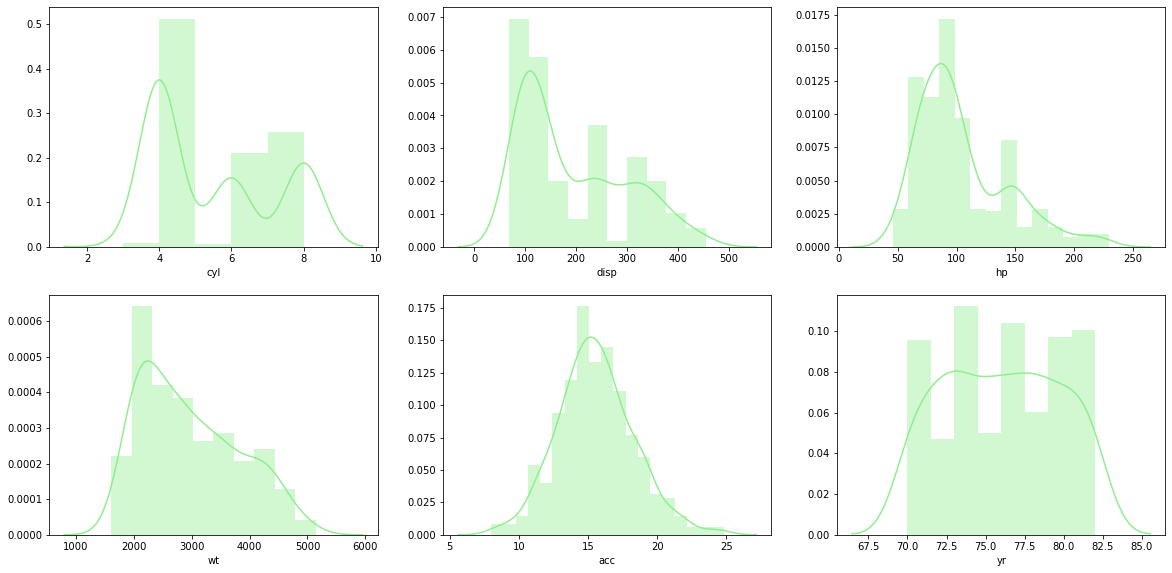

In [21]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(data['cyl'], color='lightgreen')

plt.subplot(3,3,2)
sns.distplot(data['disp'], color='lightgreen')

plt.subplot(3,3,3)
sns.distplot(data['hp'], color='lightgreen')

plt.subplot(3,3,4)
sns.distplot(data['wt'], color='lightgreen')

plt.subplot(3,3,5)
sns.distplot(data['acc'], color='lightgreen')

plt.subplot(3,3,6)
sns.distplot(data['yr'], color='lightgreen')

## Observations

1. We can see multiple peaks in the plot for cyl, this is because the column values are discrete.(4,6 and 8)
2. Variables disp,hp anf wt are right skewed indicating possible outliers
3. Acc show a symmetric distribution which shows ver few cars with large and small values most have acceleration centered at 15 - 17 units. Most of the cars seem to be small and mid size. 

Given the long tails in some distributions, let us analyze the distributions using box plot as that will highlight the outliers.

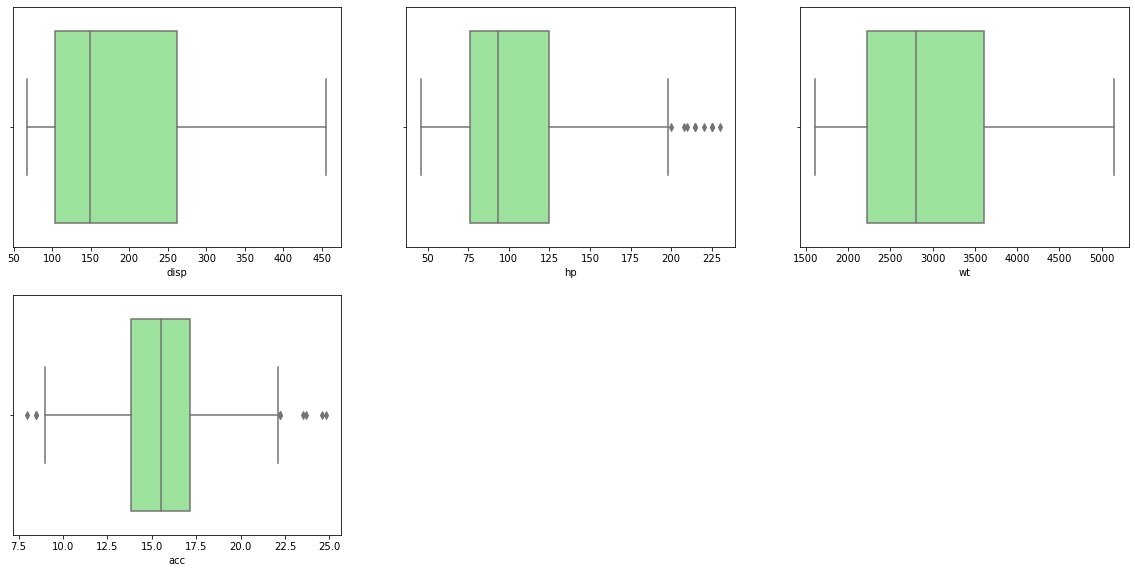

In [22]:
#using boxplots to visualise the outliers 
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.boxplot(x= data.disp, color='lightgreen')

plt.subplot(3,3,2)
sns.boxplot(x= data.hp, color='lightgreen')

plt.subplot(3,3,3)
sns.boxplot(x= data.wt, color='lightgreen')

plt.subplot(3,3,4)
sns.boxplot(x= data.acc, color='lightgreen')


## Observations

1. Boxplot is done only for continuous variables
2. Outliers (1.5 std deveations + or - 3rd quartile, 1st quartile respectively) are present only in hp and acc.
3. Hp column seems to have cars with extreme high values for horsepower.
4. Acceleration column seems to have extreme values both on lower side and upper side. 
5. The outliers could be because of typing errors or rare but possible casses. 
6. Displacement column seems to have relatively large right skew in the body of the distribution though it does not have any outliers.

Given the outliers we need to explore the reasons for these outliers and fix them if required.

In [23]:
#identifying outlier records for horsepower.

temp_out_hp=data['hp']>190
temp_out_hp
temp_out_hp[temp_out_hp==True]

5      True
6      True
7      True
8      True
13     True
25     True
26     True
27     True
28     True
67     True
90     True
94     True
95     True
116    True
Name: hp, dtype: bool

## Observations on hp outliers 

1. All the cars have valid hp values as per the information on the web
2. Some of these cars are rare as they were manufactured only in few numbers.

In [24]:
# identifying outlier records in acc 

temp_out_acc= (data['acc']<8) | (data['acc']>21)
temp_out_acc
temp_out_acc[temp_out_acc==True]

59     True
195    True
196    True
209    True
244    True
299    True
300    True
325    True
326    True
328    True
394    True
Name: acc, dtype: bool

## Observations for outliers in acceleration column 

1. Acceleration column reflects the amount of time in seconds taken by a car to reach 60mph ( approx. 100kmh).
2. Some cars listed above have significantly lower acceleration (take more time to reach 60mph) than specified in their specs.
3. This could be due to the age factor (old cars have lower acceleration than specified) or a typo.
4. The strategies for replacing outliers could be as follows 
         a. Since there are cars whith similar age and brand but very low acceleration we can replace the outliers brandwise. However this can become a difficult option as the car names are not standardised.
         b. Replace outliers with values imputed using knn algorithm as this will ensure all similar cars have similar acceleration. However this may not be true in the real world. Two cars similar in size, weight, year of manufacture etc. may have different acceleration.
         c. Replace outliers with median of the column because median as a central value represents the charecteristic of all the cars. However this can be misleading as the charecteristicsof the car can be very different. for eg as small car will have larger acceleration value than a big heavy SUV.
         d. Group the cars based on charecteristics and replace the outliers groupwise. This approach is similar to knn and hence has the same drawback as knn.
         e. Replace the outliers with the quartile values ( also known as capping). Since most of the outliers are close to the edge of 1.5 std dev from the quartiles this method seems to be the safest approach compared to others in terms of the impact on the distribution charecteristics of the column.
         
5. In this case we are going to use the approach in 4.e. to replace outliers 
6. Whichever approach we use should be verified by doing a hypothesis testing on the column before and after the outlier fixing. For eg. using paired t-test.
         

## Handling outliers 

1. Even though the outliers in horsepower column are valid values we will replace them with the nearest quartiles as there are only few records (14) with these extreme values.
2. We are replacing the outliers in acceleration column with the quartile values.
     

In [25]:
data['hp']=data['hp'].clip(lower=data['hp'].quantile(0.05), upper=data['hp'].quantile(0.95))
data['acc']=data['acc'].clip(lower=data['acc'].quantile(0.05), upper=data['acc'].quantile(0.95))

Now that the outliers have been replaced, lets plot the boxplots again to check if we've managed to get rid of the outliers 

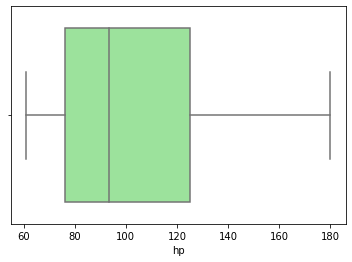

In [26]:
sns.boxplot(data['hp'],color='lightgreen')


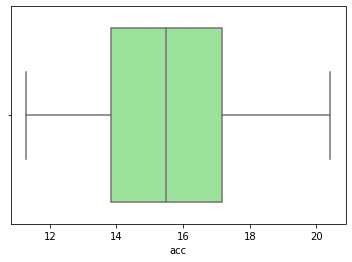

In [27]:
sns.boxplot(data['acc'],color='lightgreen')

Note : Though in this case the outliers have been addressed for both the columns and we do not see any new outliers, this may not be the case all the time. The reason is by fixing outliers we modify the standard deveations (reduce) and as a result we reduce the vlaue of 1.5 standard deveation. Because of this reduced 1.5 standard deveation data points which were earlier not outliers may now appear as outliers.
In case we observe new outliers we can ignore them and continue with our processing.

##  Hypothesis Testing for impact of outlier fixing using dependent t test 

In [28]:
# Ho : No significant difference in the distribution after outlier treatment 
# Ha : There is a significant difference in the distribution after outlier treatment 

# for hp column 
t, pval= stats.ttest_rel(data_copy['hp'],data['hp'])
print(float(pval))
if pval<0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')


0.01282492213356902
reject null hypothesis


Based on hypothesis testing of the horsepower column the stratergy of replacing outliers in horsepower with quartiles is not a good option and the result is likely to be same (reject null hypothesis) for anyother stratergy on this column.Hence we will continue to use the column values as they are without replacing the outliers.

In [29]:
data['hp']=data_copy['hp'] # copyting data from the backup for horsepower column to eliminate the imputed values for outliers.

In [30]:
# for acc column 
t, pval= stats.ttest_rel(data_copy['acc'],data['acc'])
print(float(pval))
if pval<0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

0.5857015643534299
accept null hypothesis


Based on the hypothesis testing we can see that the distribution before and after fixing the outliers seem to be similar and hence we will continue with the stratergy in this column.

## Feature Selection and correlation analysis 

We can do a correlation analysis between the attributes to understand the strength and direction of correlation between the dependent (mpg) , independent (other variables) and between the independent variables.

(9.5, -0.5)

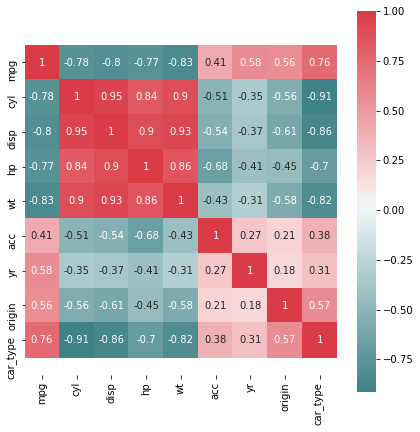

In [31]:
f, ax = plt.subplots(figsize=(7, 7))
corr=data.corr('pearson')
cp=sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(200,10,as_cmap=True),square=True,ax=ax,annot=True)
bottom,top = cp.get_ylim()
cp.set_ylim(bottom+0.5,top-0.5) #matplotlib version to 3.1.1 has a bug in the plot and mistakes in the y-axis

## Observations 

1. mpg has a strong negative correlation with cyl (-0.78), displacement (-0.8), hp (-0.77) and wt (-0.83). This is as per our understanding of the relation between these variables and mpg.
2. Between mpg and acc, yr we see a positive weak correlation.
3. As the yr ( year of manufacture) increases the car becomes younger in age and hence mileage is higher, this causes the positive correlation between mpg and year.
4. The correlation between mpg and acc is small and positive, the reason for this is small cars accelerate faster and also give higher mileage. However the weak correlation (0.41) is surprising as we expect to see a strong positive correlation.
5. The correlation between the cylinder and mpg columns is strong negative, thisis due to the fact that as number of cylinders increase the loss due to friction and heat increase leading to lower mileage.
6. Between the attributes, such as horse power, weight, displacement and cylinder we see a strong positive colinearity (correlation between independent attributes). This shows that the attributes are not truly independent of each other. 
7. We can use the columns cylinder, displacement, horesepower, weight and year to predict miles per gallon.
8. Corr plot gives a quantitative idea about the correlation but we also need to check whether the correlation is strictly linear or curved for which we will use pairplot.

## Pairplot Analysis 

In [ ]:
sns.pairplot(data,diag_kind='kde') # kde stands for kernel density estimate, i.e. how the distribution is in the population, 
                                   # based on gaussian projection of the data at hand 
                                   # using a mathematical function also called kernel.

## Observations 

1. Diagonal analysis
    a. In the cylinder column we see three peaks because this is a categorical column where majority of the car have 3 distinct values.
    b. In disp column again we see multiple peaks which should be explored to understand what causes these peaks, is it because of missing values or some kind of natureal groupings in the data.

2. Off - daigonal
    a. The relationship between mpg and disp, hp and weight is not strictly linear. We can see a curvature in the scatterplot.
    b. In the scatterplot for mpg vs acc we see a weak positive correlation but the scatter plot looks almost like a cloud indicating that it is not likely to be a good predictor of mpg.
    c. Between mpg and year we see a weak linear positive correlation.
    d. Between the attributes cyl,disp,hp,wt and yr we see strong positive colinearity.

Lets explore the occurences of multiple peaks in the various columns and check the preasence of any clusters in the data.

## Cluster Analysis using K-means and Hierarchical Clustering

Clustering helps us to extract hidden infromation in the data which usually is not visible through descriptive analytics. Clustering uses distance calculations to identify similar data points hence it it important that we scale the data on all the attributes to prevent attributes with larger scale from influencing the distance dispropotionately for which we will use Z-scoring.

In [ ]:
from scipy.stats import zscore
data_z=data.apply(zscore)

In [ ]:
data.info()

In [ ]:
# Finding the optimal number of clusters using Elbow method


clusters=range(1,10)  # creating one single cluster is useless, starting from two
meanDistortions=[] # array to hold within cluster variance, a.k.a inertia

for k in clusters:
    model= KMeans(n_clusters=k)
    model.fit(data_z)
    prediction= model.predict(data_z)
    meanDistortions.append(sum(np.min(cdist(data_z, model.cluster_centers_, 'euclidean'), axis=1)) / data_z.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')  # usign blue cross for every number of cluster value and mean distortion
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

# Note: we can replace calculation of meandistortion with another function called cluster.inertia that does all the calculation
# automatically
#meanDistortion.append(model.inertia_)

## Observations

1. The elbow plot shows two potential candidates for number of clusters which are k = 3 and  k = 4 where k is number of clusters


In [ ]:
# Let us first start with K = 3
final_model=KMeans(3)  
final_model.fit(data_z)   # defines three clusters 
prediction=final_model.predict(data_z)  # captures which cluster each data point in the datset belongs to

#Append the prediction 
data_z["Group"] = prediction  # creating a new column in the dataframe to reflect which cluster a record belongs to

In [ ]:
data_z.groupby(['Group']).count()

Let us analyze 3 cluster first using boxplot.In this each cluster will be represented as a box with the quartiles and whiskers in each individual dimension.

## cluster analysis on the horsepower column

In [ ]:
data_z.boxplot(by='Group',layout=(3,3),figsize=(15,10),grid=False)

## Observations 

1. In the acceleration column the cluster id 0 and id 1 are parallel while cluster id 2 is significantly seperated out.
2. In cylinder column the boxplot is coming as points because it is a categorical column.
3. In the displacement column, we see the three clusters significantly seperated out. Cluster id 1 is lowest while cluster id 0 is higher and cluster id 2 is the highest.
4. In hp column again the 3 clusters are significantly seperated out, cluster 1 is the lowest in hp, cluster 0 is higher and cluster 2 is highest.
5. In the mpg column the three clusters are significantly seperated out. Cluster id 1 has highest mpg while cluster id 0 has 2nd highest and cluster id 2 the least.
6. In the wt column, the three clusters are significantly seperated out. Cluster id 1 has the lowest weight, cluster id 0 has higher and the highest is cluster id 2.
7. In the year column the clusters are seperated out but not significantly.

Interpretation of the clusters 

1. Combining observations in point 3,4,5 and 6, cluster id 1 has lowest displacement, lowest hp, highest mpg and lowest weight. This seems to be a cluster of small cars because these are characteristics of small car.

2. Similarly cluster id 0 which has higher displacement, higher hp, lesser mpg and higher wt than cluster id 1, but has lower disp, lower hp, higher mpg and lower wt than cluster id 2 seems to be a bunch of sedans (mid size cars).

3. Cluster id 2 seems to be a bunch large cars which have very high horsepower, weight, displacement and low mpg.

This analysis of clusters is in line with the observations in the real world where cars belong to different these 3 segments.
There is a possibility of a fourth cluster consisting of the rare models of cars which were released in limited quantities.For out analysis we will go with 3 natural clusters.

## Caution  
The cluster ids start from 0. The cluster id may not be the same everytime the code is executed. Hence The interpretation above referring to the three cluster ids may become invalid  if the code is run again. 

## Hierarchical Clustering 

In [ ]:
# This is another way of clustering that can be used to confirm our findings from KMeans
# clustering which belongs to flat clustering methods.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
data_z=data.apply(zscore)

hc_mod= AgglomerativeClustering(n_clusters=3,affinity = 'euclidean',linkage='ward') #Average linkage method is used assuming 
                                                                                       # the data on the attributes are normally
                                                                                       #distributed

In [ ]:
data_z.info()

In [ ]:
hc_mod.fit(data_z) #Creating the hierarchical clusters 

In [ ]:
# let us visualise these clusters using a dendogram 

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage 
from scipy.spatial.distance import pdist # this function will create the pairwise euclidean distance grid for the data points.

In [ ]:
avl= linkage(data_z,'ward')
c, coph_dist=cophenet(avl,pdist(data_z))
print('Cophenetic coefficient :',c)

Cophenetic coefficient : 0.7728927804305963


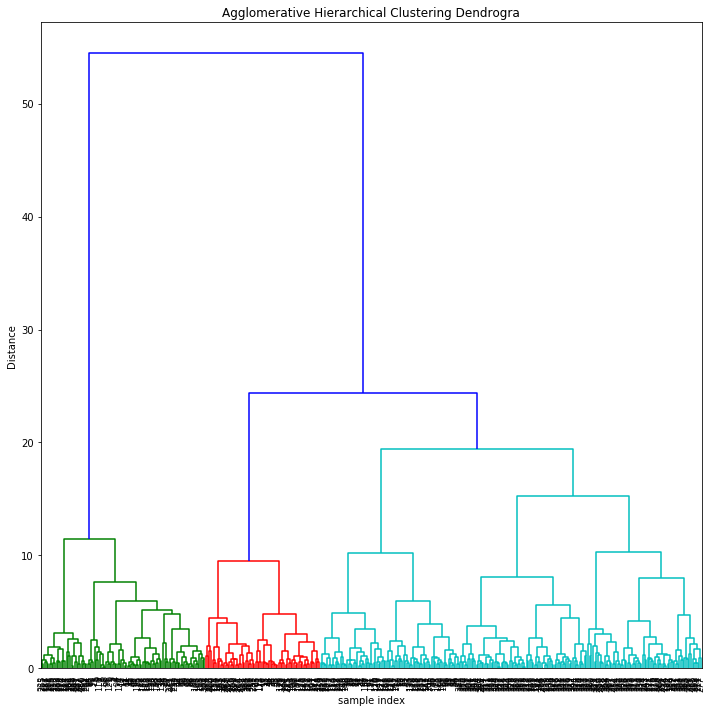

In [ ]:
# Plotting the dendrogram
plt.figure(figsize=(10,10))
plt.title('Agglomerative Hierarchical Clustering Dendrogra')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(avl, leaf_rotation=90, color_threshold =23, leaf_font_size= 8. )
plt.tight_layout()

## Observations

1. Of all the linkage methods (single, complete, average and ward), ward method gives the best hierarchical clusters. The 
   Cophenetic coefficient for this method is greater than 70% which is a good sign of natural clusters
2. The reason for this could be that the ward and KMeans are similar in their objectives (minimize increase in within cluster
   variance)

Next, we will capture the cluster labels for every record and do the boxplot

In [ ]:
data_z['labels']=hc_mod.labels_ #assigning the cluster labels to individual records 


In [ ]:
data_z.groupby(['labels']).count() #counting number of records in each cluster.Ensure there are no satellite clusters

,cyl,disp,hp,wt,acc,yr,mpg
labels,,,,,,,
0,230,230,230,230,230,230,230
1,99,99,99,99,99,99,99
2,69,69,69,69,69,69,69


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E71A71CC8>,
      dtype=object)

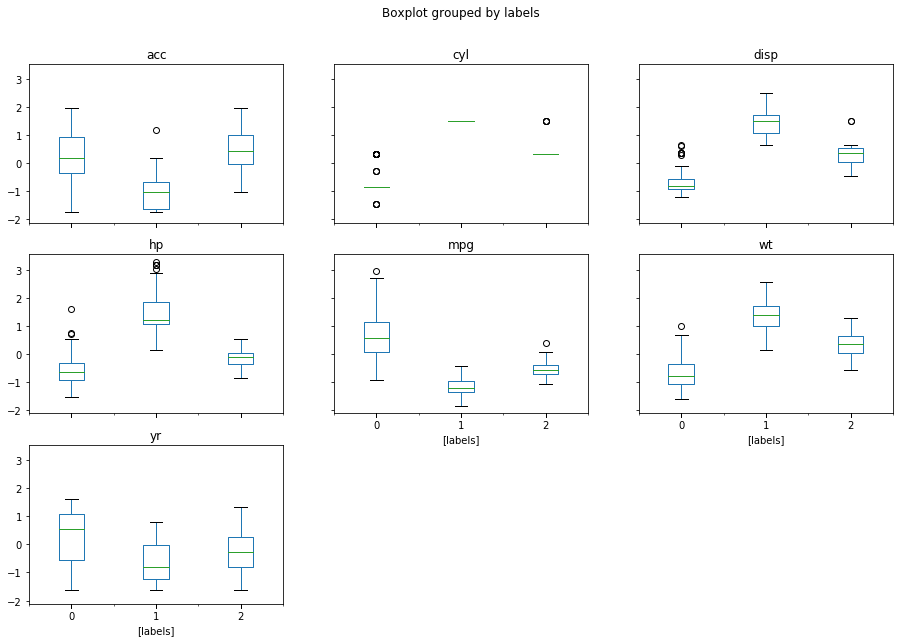

In [ ]:
data_z.boxplot(by='labels',layout=(3,3),figsize=(15,10),grid=False)

## Observations

1. There are three natural clusters. Cluster id 0 represents small car because it is high on mpg, lowest on hp, wt and displacement. These are characterisitcs of small car
2. Cluster id 1 represents large cars as it is lowest in mpg, highest in wt, hp and displacement. These are characterisitcs of large car
3. Cluster id 2 is the sedans 

Both the hierarchical and KMeans clustering clearly demonstrate presence of three natural clusters for the three segments of cars in the industry. There are a few cars which are rare and produced in limited quantities which may form a fourth but small cluster. Hence we are going ahead with three clusters only

## Split the original data as per the cluster definitions into small, medium and large car data sets

1. We scaled the entire data for clustering. On finding the natural clusters, we need to split the data into three datasets which will be used for building three linear regression models
2. For building the models when we split the scaled data into training set and test set, it will result in data leaks as the Zscored value in training is influenced by values in testing data already before the split. 
3. To prevent data leaks we will work on the original data which is not scaled.
4. Hence we take the lables from the clusters into the original data which is not scaled
5. Split the original data into three sets
6. We will split the three sets into training and testing respectively 
7. We will not do any scaling on these datasets as scaling does not effect the scores of linear regression models

In [ ]:
data['labels'] = hc_mod.labels_
# This data will be used for regression later where the reason for not using data_z will be discussed

In [ ]:
small_df = data[data['labels']==0]
small_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
14,4,113.0,95.0,2372,15.000,70,24.0,0
18,4,97.0,88.0,2130,14.500,70,27.0,0
19,4,97.0,46.0,1835,20.415,70,26.0,0
20,4,110.0,87.0,2672,17.500,70,25.0,0
21,4,107.0,90.0,2430,14.500,70,24.0,0


In [ ]:
medium_df=data[data['labels']==2]
medium_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
15,6,198.0,95.0,2833,15.5,70,22.0,2
16,6,199.0,97.0,2774,15.5,70,18.0,2
17,6,200.0,85.0,2587,16.0,70,21.0,2
24,6,199.0,90.0,2648,15.0,70,21.0,2
33,6,232.0,100.0,2634,13.0,71,19.0,2


In [ ]:
large_df=data[data['labels']==1]
large_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
0,8,307.0,130.0,3504,12.000,70,18.0,1
1,8,350.0,165.0,3693,11.500,70,15.0,1
2,8,318.0,150.0,3436,11.285,70,18.0,1
3,8,304.0,150.0,3433,12.000,70,16.0,1
4,8,302.0,140.0,3449,11.285,70,17.0,1


Given the three distinct clustesrs, should we build one single model for predicting mpg or three different models.

To decide this let us build multivariate linear regression on the entire data and separately on each cluster data


## Multivariate Linear Regression entire dataset

In [ ]:
x= data.drop(['mpg','labels'],axis=1)
y= data.pop('mpg')

In [ ]:
# splitting the data into training set and test set 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=24)

In [ ]:
from sklearn.linear_model import LinearRegression
mod1 = LinearRegression()
mod1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, mod1.coef_[idx]))


The coefficient for cyl is -0.5031929509100906
The coefficient for disp is 0.00883764715220844
The coefficient for hp is -0.011943991201898433
The coefficient for wt is -0.006694254303009853
The coefficient for acc is -0.09489179067089787
The coefficient for yr is 0.6779820375797242


In [ ]:
# Let us check the intercept for the model

intercept = mod1.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -4.311742075684759


In [ ]:
print('Training score :',mod1.score(x_train,y_train))
print('Test score :',mod1.score(x_test,y_test))

Training score : 0.8252901417383962
Test score : 0.7535042541071166


## Observations 

1. The model seems to be overfitting as a result of small training set leading to curse of dimensionality.This is evident from the comparision of model performance in training versus test.
2. Hence when we run this model cluster wise, the situaltion is likely to be worse. 

## Linear Regression on small car data 

In [ ]:
small_x=small_df.drop(['mpg','labels'],axis=1)

In [ ]:
small_y=small_df.pop('mpg')

In [ ]:
# splitting the data into training set and test set 

sx_train,sx_test,sy_train,sy_test=train_test_split(small_x,small_y,test_size=0.30,random_state=24)

In [ ]:
mod2 = LinearRegression()
mod2.fit(sx_train,sy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
for idx, col_name in enumerate(sx_train.columns):
    print("The coefficient for {} is {}".format(col_name, mod2.coef_[idx]))

The coefficient for cyl is 1.81463548992285
The coefficient for disp is -0.05230566075137188
The coefficient for hp is -0.06816827851963413
The coefficient for wt is -0.005797552082526715
The coefficient for acc is -0.1513194724522297
The coefficient for yr is 0.90143627174342


In [ ]:
# Let us check the intercept for the model

intercept = mod2.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -20.783709669871143


In [ ]:
print('Training score :',mod2.score(sx_train,sy_train))
print('Test score :',mod2.score(sx_test,sy_test))

Training score : 0.716626887183988
Test score : 0.6267466010298033


## Observation 

1. Linear Regression on Small car data set is overfitting as is evident from the training score versus test score.
2. The coefficient for cyl column is suspicious as the relationship between mpg and cylinder is strong negative as per the pair plot.
3. The suspicious coefficient could be due to colinearity.

## Linear Regression on medium car data 

In [ ]:
medium_x=medium_df.drop(['mpg','labels'],axis=1)
medium_y=medium_df.pop('mpg')

In [ ]:
# splitting the data into training set and test set 

mx_train,mx_test,my_train,my_test=train_test_split(medium_x,medium_y,test_size=0.30,random_state=24)

In [ ]:
mod3 = LinearRegression()
mod3.fit(mx_train,my_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
for idx, col_name in enumerate(sx_train.columns):
    print("The coefficient for {} is {}".format(col_name, mod3.coef_[idx]))

The coefficient for cyl is 3.2137669218179514
The coefficient for disp is -0.007899643334677056
The coefficient for hp is -0.019088476496272395
The coefficient for wt is -0.0008687923414381304
The coefficient for acc is -0.49200554765157134
The coefficient for yr is 0.3196547329512555


In [ ]:
# Let us check the intercept for the model

intercept = mod3.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -9.595603539291861


In [ ]:
print('Training score :',mod3.score(mx_train,my_train))
print('Test score :',mod3.score(mx_test,my_test))

Training score : 0.6310836221363493
Test score : -0.060331676840832626


 ## Observations 
 
 1. This model is worse than the random model (which predicts the mean value of y for all values of x), this is the reason why the test score is comingout negative.
 
 2. Note the negative test score! Coeff of determinant (R^2) can be negative!] What we discuss in class is R^2 ranges between 0 and 1... This is strictly no true and this tells us two important information points -
    a. R^2 is not a squared quantity. It is so only for simple linear regression (only one X variable). In all other cases R^2 is only a label
    b. R^2  = 1 - (SSE / SST)    - is there anything in the formula which says SSE cannot be greater than SST? 
    
3. Under what conditions can SSE be greater than SST? 
 

## Linear Regression model on Large car dataset 

In [ ]:
large_x=large_df.drop(['mpg','labels'],axis=1)
large_y=large_df.pop('mpg')

In [ ]:
# splitting the data into training set and test set 

lx_train,lx_test,ly_train,ly_test=train_test_split(large_x,large_y,test_size=0.30,random_state=24)

In [ ]:
mod4 = LinearRegression()
mod4.fit(lx_train,ly_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
for idx, col_name in enumerate(sx_train.columns):
    print("The coefficient for {} is {}".format(col_name, mod4.coef_[idx]))

The coefficient for cyl is 0.0
The coefficient for disp is 0.00604173912616375
The coefficient for hp is -0.011925934142250351
The coefficient for wt is -0.0027730903017192106
The coefficient for acc is -0.21637725023961094
The coefficient for yr is 0.3634521142547647


In [ ]:
# Let us check the intercept for the model

intercept = mod4.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.0824194477687605


In [ ]:
print('Training score :',mod4.score(lx_train,ly_train))
print('Test score :',mod4.score(lx_test,ly_test))

Training score : 0.6365890384487791
Test score : 0.38665960765860063


## Observations 

1. For large car also the linear model is overfitting because of lack of data as is evident from the training and test scores.

# Overall Analysis 

Comparing the coefficients across overall and the three cluster based models.

As is evident from the table above the coefficients for the different attributes to predict mpg is very different acrosss the datasets, it is a clear indication that in the different segments the relationship between mpg and these attributes is very different. Hence, it is logical that we should have seperate multivariate linear regression models for each segment. However because of the small size of training dataset across the segments, the individual models overfit and performance is average to poor on test data.

## Suggestions 

1. If we fit multivariate linear regression on the entire dataset it will create model that will neither represent the small, medium or large cars correctly. 

2. The observations in the pairplot clearly show that the relation between mpg and the attributes such as hp, wt, disp etc is not strictly linear

3. Fitting a linear model on these attributes will result in large SSE and also hetroskedasticity i.e. error in prediction will be vary for different values of the input variables

4. since segment wise modeling given the data is not giving good results, we should create quadratic linear models to capture the curvature observed in the relation between mpg and the attributes. When this is done on the entire data, that will give a much better model (least SSE, homoscedasticity and generlisable) in terms of scores (coefficient of determinant)

5. Since linear regression models are impacted by outliers and there are some data points representing those rare but real cars manufactured in limited quantity, that are outliers on hp and mpg we can drop these records from the training set.

6. To handle such outliers in production (which is a possibility) one should check the attribute values to ensure they are within the range considered as normal, else they should be handled before using for predict.


